# **Data Toolkit Assignment**

###1. What is NumPy, and why is it widely used in Python
NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides the `ndarray` — a fast, memory-efficient, homogeneous n-dimensional array — plus a large collection of mathematical functions to operate on these arrays. NumPy is widely used because:
- Performance: `ndarray` operations are implemented in C and use contiguous memory which makes vectorized operations much faster than equivalent Python loops.
- Memory efficiency: NumPy arrays use less memory than Python lists for large numeric datasets.
- Rich functionality: Linear algebra, Fourier transforms, random number generation, and optimized mathematical routines are all available.
- Ecosystem: Many scientific and data libraries (Pandas, SciPy, scikit-learn, TensorFlow) are built on top of NumPy, making it the lingua franca for numerical data in Python.

**Example:** creating arrays and performing vectorized arithmetic:
```python
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + b)       # [5 7 9]
print(a * 2)       # [2 4 6]
```

###2. How does broadcasting work in NumPy
Broadcasting is a set of rules NumPy follows to perform arithmetic operations on arrays of different shapes. When two arrays have compatible shapes, NumPy 'stretches' the smaller array across the larger one so element-wise operations can be performed without making explicit copies. Compatibility rules (simplified):
1. If arrays differ in dimensionality, prepend 1s to the smaller shape until dimensions match.
2. For each dimension, sizes are compatible if they are equal or one of them is 1.
3. The result shape is the maximum size along each dimension.

Broadcasting allows concise code and efficient memory usage. Example: adding a 1D offset to each row of a 2D matrix:
```python
import numpy as np
M = np.ones((3,4))
v = np.array([1,2,3,4])   # shape (4,)
print(M + v)              # v broadcast across each row
```

###3. What is a Pandas DataFrame
A Pandas `DataFrame` is a two-dimensional, tabular data structure with labeled axes (rows and columns). It can hold heterogeneous data types (numbers, strings, dates) and provides powerful functionality for data manipulation: indexing, selection, grouping, aggregation, joining/merging, handling missing data, and time-series operations. `DataFrame` is the primary data structure used in data analysis workflows and is built on top of NumPy arrays.

**Example:** create a DataFrame from a dict:
```python
import pandas as pd
df = pd.DataFrame({'name': ['A','B'], 'age': [25, 30]})
print(df)
```

###4. Explain the use of the groupby() method in Pandas
`groupby()` splits the data into groups based on one or more keys (columns), then allows applying aggregation, transformation, or filtration operations to each group independently — implementing the split-apply-combine strategy. Typical uses include computing group-wise summaries (mean, sum), applying custom functions, or filtering groups.

**Example:** compute average salary by department:
```python
df.groupby('department')['salary'].mean()
```

Under the hood, `groupby()` creates group indices and uses optimized aggregation routines, minimizing Python-level loops and improving performance.

###5. Why is Seaborn preferred for statistical visualizations
Seaborn is a high-level visualization library built on Matplotlib that provides a concise interface for common statistical plots and integrates tightly with Pandas DataFrames. Reasons to prefer Seaborn:
- Pre-built statistical plots (boxplots, violin plots, pairplots, jointplots) that are tuned for data analysis.
- Automatic handling of DataFrame semantics (column names used for labels).
- Aesthetic defaults (themes, color palettes) that produce publication-ready plots with less configuration.
- Built-in functionality for plotting distributions and relationships with confidence intervals.

**Example:** distribution plot:
```python
import seaborn as sns
sns.histplot(df['age'], kde=True)
```

###6. What are the differences between NumPy arrays and Python lists
Key differences:
- Homogeneity: NumPy arrays are homogeneous (single dtype) which enables low-level optimizations. Python lists can contain mixed types.
- Performance: Numeric operations on NumPy arrays are vectorized and executed in optimized C code, making them much faster for large arrays than Python lists and loops.
- Memory layout: NumPy arrays use contiguous blocks of memory; lists store pointers to Python objects, adding overhead.
- Built-in math: NumPy provides mathematical, linear algebra, and broadcasting operations; lists require explicit loops or comprehensions.

**Example:** summing elements:
```python
import numpy as np
a = np.arange(1_000_000)
# much faster than using sum() over a Python list of same size
```

###7. What is a heatmap, and when should it be used
A heatmap is a 2D graphical representation of data where values are represented by color scales. Heatmaps are ideal to visualize a matrix of values (correlation matrices, confusion matrices, pivot tables) to quickly spot patterns, clusters, or outliers. Use heatmaps when you need to inspect pairwise relationships, large tabular structures, or spatial temporally varying data.

**Example:** correlation heatmap with Seaborn:
```python
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
```

###8. What does the term “vectorized operation” mean in NumPy
A vectorized operation performs element-wise computations on entire arrays without explicit Python loops. The operations are executed in compiled code, leading to significant speed-ups. Vectorization leads to clearer, shorter code and better performance.

**Example:** compute square of each element:
```python
import numpy as np
x = np.arange(10)
y = x**2   # vectorized; no Python loop
```

###9. How does Matplotlib differ from Plotly
Matplotlib is a mature, low-level plotting library for Python that produces static figures (though interactive backends exist). Plotly is a high-level library for interactive, browser-based visualizations (built on JavaScript). Differences:
- Interactivity: Plotly charts are interactive by default (zoom, hover), Matplotlib is mainly static (though interactive widgets exist).
- Output: Plotly produces HTML/JS artifacts viewable in browsers; Matplotlib produces PNG/SVG and can be embedded in notebooks.
- Ease of use: Matplotlib gives granular control; Plotly provides high-level interactive visuals with built-in interactivity.
- Use cases: Matplotlib for publication-quality static plots; Plotly for dashboards and exploratory interactive plots.


###10. What is the significance of hierarchical indexing in Pandas
Hierarchical (MultiIndex) indexing allows multiple levels of row or column labels in a DataFrame or Series. It is useful for representing higher-dimensional data in 2D structures, performing grouped pivots, and doing complex aggregations. MultiIndex enables concise reshaping operations and multi-level grouping.

**Example:** index by country and year for time series:
```python
df.set_index(['country','year']).sort_index()
```

###11. What is the role of Seaborn’s pairplot() function
`pairplot()` visualizes pairwise relationships in a dataset by creating a grid of plots: scatterplots for variable pairs and histograms/ KDE on the diagonal. It’s valuable for exploratory data analysis to reveal correlations, clusters, and distributions.

**Example:** `sns.pairplot(df[['age','income','score']])`

###12. What is the purpose of the describe() function in Pandas
`DataFrame.describe()` provides summary statistics (count, mean, std, min, quartiles, max) for numerical columns by default. It’s a quick way to get an overview of central tendency, spread, and distribution of columns, and to spot anomalies or missing values.

**Example:** `df.describe()`

###13. Why is handling missing data important in Pandas
Missing data can bias analyses, cause errors in algorithms, and lead to incorrect conclusions. Pandas offers tools to detect (`isna()`), remove (`dropna()`), and impute missing values (`fillna()`). Proper handling ensures robustness: for instance, imputing with medians or using model-based imputation, or carefully dropping rows/columns when appropriate.


###14. What are the benefits of using Plotly for data visualization
Plotly provides interactive, web-ready visualizations with rich hover info, zooming, and easy embedding in dashboards. Benefits include:
- Interactivity for exploration
- Built-in themes and export to HTML
- Support for 3D and geographic plots
- Tight integration with Dash for full web apps

Plotly is great when users need to explore data interactively or publish interactive visualizations online.

###15. How does NumPy handle multidimensional arrays
NumPy's `ndarray` supports arbitrary dimensions (1D, 2D, 3D, ...). Arrays are described by their `shape` tuple and `dtype`. NumPy uses row-major memory layout by default (C-order), and provides slicing, indexing, reshaping, and broadcasting across dimensions.


###16. What is the role of Bokeh in data visualization
Bokeh is a Python library for creating interactive visualizations for modern web browsers. It emphasizes streaming and real-time data, server-driven interactivity, and can output standalone HTML or integrate with Flask/Django. Bokeh balances ease-of-use and interactivity, often used for dashboards and exploratory tools.

###17. Explain the difference between apply() and map() in Pandas
- `map()` is primarily a Series method that maps values of a Series according to an input correspondence (dict or function). It’s element-wise and often used for value replacement or transformation.
- `apply()` can be used on Series or DataFrames. On a DataFrame, `apply()` can run a function across rows or columns and can return aggregated or transformed results.
`map()` is typically faster for simple element-wise ops; `apply()` is more flexible for complex operations.


###18. What are some advanced features of NumPy
Advanced NumPy features include:
- Memory views and `ndarray` buffering for zero-copy slices
- Broadcasting with complex rules for shape alignment
- Structured arrays and record arrays for heterogeneous data
- Advanced indexing (fancy integer indexing, boolean masks)
- Linear algebra module `numpy.linalg` and FFT module `numpy.fft`
- Custom dtype creation and strides manipulation for performance tuning

###19. How does Pandas simplify time series analysis
Pandas has powerful time-series tools: `DatetimeIndex`, resampling (e.g., `resample('M')`), rolling/window operations (`rolling()`), shifting (`shift()`), handling timezone-aware timestamps, and easy parsing of dates. These utilities let analysts align, aggregate, and transform temporal data efficiently.


###20. What is the role of a pivot table in Pandas
A pivot table reshapes data by aggregating values across two axes (rows and columns) using an aggregation function. It’s useful for summarizing and cross-tabulating datasets (similar to Excel pivot tables).

###21. Why is NumPy’s array slicing faster than Python’s list slicing
NumPy slicing returns views (no data copy) whenever possible and relies on contiguous memory with uniform data types; slicing is implemented in C loops. Python list slicing creates a new list and copies pointers to Python objects, which is slower and uses more memory.

###22. What are some common use cases for Seaborn?
Common Seaborn use cases:
- Visualizing distributions (`histplot`, `kdeplot`)
- Comparing groups (`boxplot`, `violinplot`)
- Plotting relationships (`scatterplot`, `regplot`)
- Exploratory pairwise analysis (`pairplot`)
- Visualizing categorical data (`countplot`, `barplot`)

Seaborn is excellent for statistical EDA and quick, polished visuals.

## **Practical Questions**

###1. How do you create a 2D NumPy array and calculate the sum of each row

In [ ]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
row_sums = arr.sum(axis=1)
print('Array:\n', arr)
print('Sum of each row:', row_sums)

Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of each row: [ 6 15 24]


###2. Write a Pandas script to find the mean of a specific column in a DataFrame

In [ ]:
import pandas as pd
df = pd.DataFrame({'name':['A','B','C'],'age':[25,30,22],'score':[80,90,85]})
mean_age = df['age'].mean()
print('Mean age:', mean_age)

Mean age: 25.666666666666668


###3. Create a scatter plot using Matplotlib

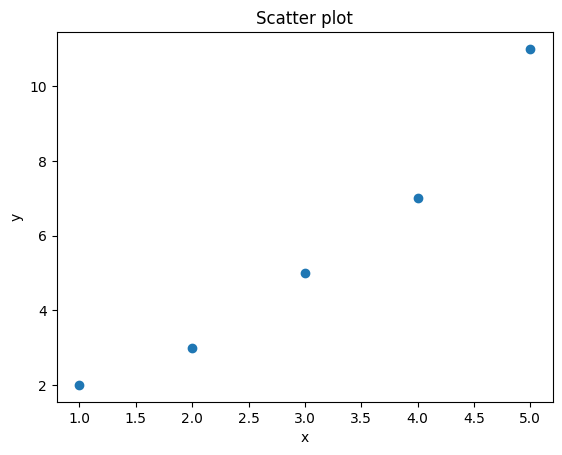

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,3,5,7,11]
plt.scatter(x,y)
plt.title('Scatter plot')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

###4. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap

<Axes: >

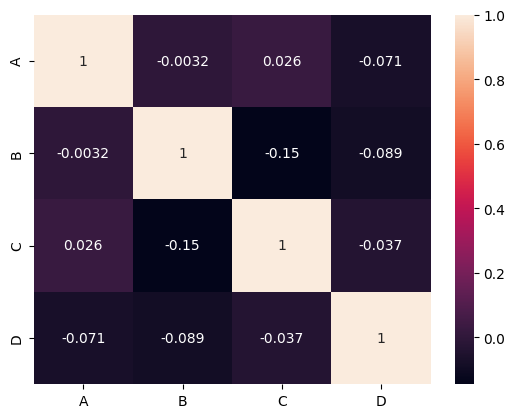

In [ ]:
import seaborn as sns, pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100,4), columns=list('ABCD'))
corr = df.corr()
sns.heatmap(corr, annot=True)

###5. Generate a bar plot using Plotly

In [ ]:
import plotly.express as px, pandas as pd
df = pd.DataFrame({'fruits':['apple','banana','orange'],'count':[10,15,7]})
fig = px.bar(df, x='fruits', y='count', title='Fruit counts')
fig.show()

###6. Create a DataFrame and add a new column based on an existing column

In [ ]:
import pandas as pd
df = pd.DataFrame({'price':[100,200,150]})
df['tax'] = df['price'] * 0.18
print(df)

   price   tax
0    100  18.0
1    200  36.0
2    150  27.0


###7. Write a program to perform element-wise multiplication of two NumPy arrays

In [ ]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a * b)  # [4 10 18]

[ 4 10 18]


###8. Create a line plot with multiple lines using Matplotlib

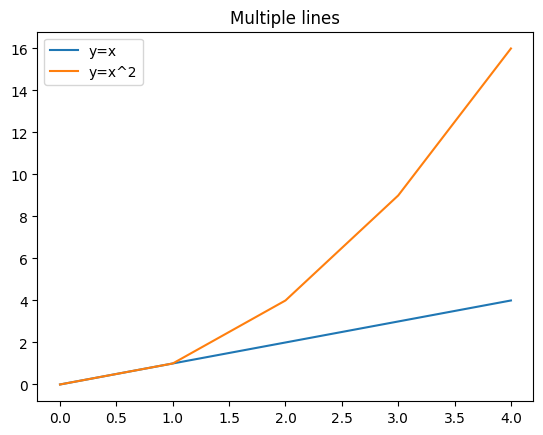

In [ ]:
import matplotlib.pyplot as plt
x = [0,1,2,3,4]
plt.plot(x, [i for i in x], label='y=x')
plt.plot(x, [i**2 for i in x], label='y=x^2')
plt.legend(); plt.title('Multiple lines'); plt.show()

###9.. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold

In [ ]:
import pandas as pd
df = pd.DataFrame({'name':['A','B','C'],'score':[50,80,70]})
filtered = df[df['score'] > 65]
print(filtered)

  name  score
1    B     80
2    C     70


###10. Create a histogram using Seaborn to visualize a distribution

<Axes: ylabel='Count'>

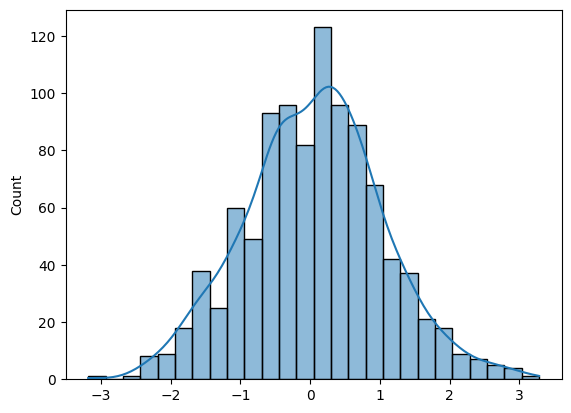

In [ ]:
import seaborn as sns, numpy as np
data = np.random.randn(1000)
sns.histplot(data, kde=True)

###11. Perform matrix multiplication using NumPy

In [ ]:
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = A.dot(B)
print(C)

[[19 22]
 [43 50]]


###12. Use Pandas to load a CSV file and display its first 5 rows

In [ ]:
import pandas as pd
import io

# Sample data in a string format, similar to what you'd find in a CSV file
csv_data = """
Name,Age,City
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
Diana,40,Houston
Eve,45,Phoenix
Frank,50,Philadelphia
"""

# Create a file-like object from the string data
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    Diana   40      Houston
4      Eve   45      Phoenix


###13. Create a 3D scatter plot using Plotly.

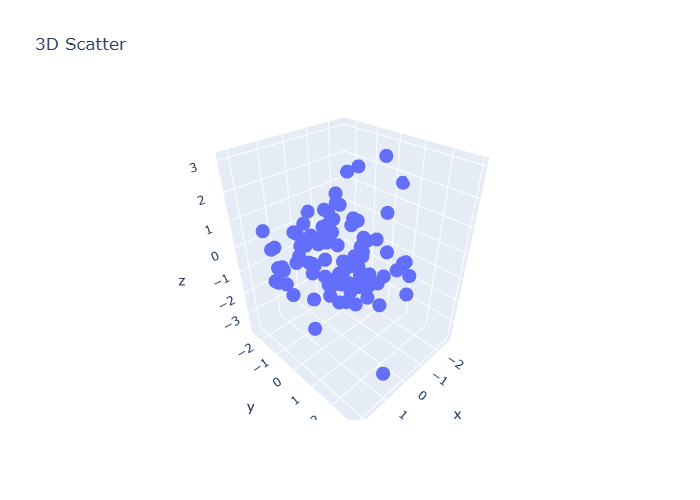

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
from IPython.display import Image
df = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'z': np.random.randn(100)
})

fig = px.scatter_3d(df, x='x', y='y', z='z', title='3D Scatter')

# Save as static image
fig.write_image("3dscatter.png")

Image("3dscatter.png")